### 1. 高斯混合模型示意图

In [1]:
import numpy as np
gauss = lambda x, mu, sigma : np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma)) / (np.sqrt(2*np.pi)*sigma)

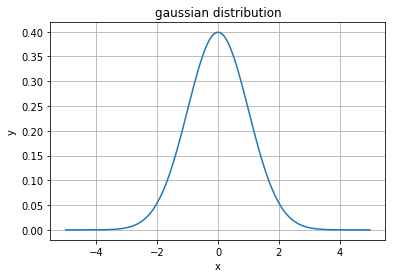

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

x = np.arange(-5,5,0.01)
y = gauss(x,0,1)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel='x', ylabel='y',
       title='gaussian distribution')
ax.grid()

plt.show()

In [79]:
import numpy as np
gauss = lambda x, mu, sigma: np.exp(-(1/2) * np.dot((x-mu), np.linalg.inv(sigma)).dot((x-mu).T)) / (2*np.pi/np.sqrt(np.linalg.det(sigma)))
result = gauss(np.array([[1,2]]), np.array([[0,0]]), np.array([[1,0],[0,1]]))
float(np.squeeze(result))

0.013064233284684921

### 2. 创造高斯混合模型数据集

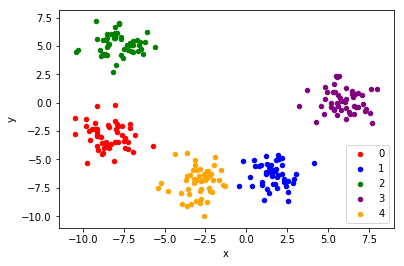

In [61]:
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs

% matplotlib inline

# generate 2d classification dataset
X, y = make_blobs(n_samples=250, centers=5, n_features=2)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:"green", 3:"purple", 4:"orange"}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### 3. 高斯混合聚类

In [80]:
import numpy as np
from functools import reduce

class GMM(object):
    def __init__(self, class_num, max_iter):
        """ 初始化
        
        arguments:
        ----------
        class_num: int, the number of cluster
        max_iter:  int, the max iter
        """
        self._class_num = class_num
        self._max_iter = max_iter
        self._labels = np.array(range(class_num))
        
        # 高斯混合模型参数
        self._mu = None
        self._sigma = None
        self._mixture_coefficient = None
    
    def _init(self, X):
        """ 初始化高斯混合模型参数
        """ 
        self._mixture_coefficient = np.array([1/self._class_num] * self._class_num)
        random_inx = np.random.choice(range(len(X)), size=self._class_num, replace=False)
        self._mu = X[random_inx]
        samples_num, features_num = X.shape
        self._sigma = np.tile(np.eye(features_num) / features_num, [self._class_num,1]).reshape(self._class_num, features_num, features_num)
        
    def fit(self, X):
        """ 训练高斯混合模型
        """
        # 训练初始化
        self._init(X)
        
        # 迭代
        samples_num, features_num = X.shape
        for _ in range(self._max_iter):
            # E 步 -- 计算每个样本属于每个高斯分布的后验概率
            class_result = np.zeros((samples_num, self._class_num))
            for i, coef, mu, sigma in zip(self._labels, self._mixture_coefficient, self._mu, self._sigma):
                ith_class_result = coef * gauss(X, mu, sigma).diagonal()
                class_result[:,i] = ith_class_result
            class_result = class_result / np.sum(class_result, axis=1).reshape([len(class_result),-1])
            
            # M 步
            for i in self._labels:
                old_mu = np.sum(class_result[:, i].reshape([samples_num, -1]) * X, axis=0) / np.sum(class_result[:, i])
                self._mu[i] = old_mu
                self._sigma[i] = reduce(lambda x,y:x+y[0] * np.dot((y[1]-old_mu).T, y[1]-old_mu), zip(class_result[:,i], X), 0)
                self._mixture_coefficient[i] = np.sum(class_result[:, i]) / samples_num
        
    def predict_prob(self, X):
        """ 预测
        """
        samples_num, features_num = X.shape
        class_result = np.zeros((samples_num, self._class_num))
        for i, coef, mu, sigma in zip(self._labels, self._mixture_coefficient, self._mu, self._sigma):
            ith_class_result = coef * gauss(X, mu, sigma).diagonal()
            class_result[:,i] = ith_class_result
        class_result = class_result / np.sum(class_result, axis=1).reshape([len(class_result),-1])
        return class_result
        

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


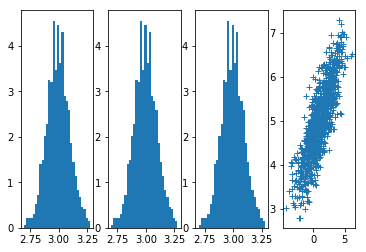

In [11]:
# coding=utf-8
 
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
 
sampleNo = 1000;
# 一维正态分布
# 下面三种方式是等效的
mu = 3
sigma = 0.1
np.random.seed(0)
s = np.random.normal(mu, sigma, sampleNo)
plt.subplot(141)
plt.hist(s, 30, normed=True)
 
np.random.seed(0)
s = sigma * np.random.randn(sampleNo) + mu
plt.subplot(142)
plt.hist(s, 30, normed=True)
 
np.random.seed(0)
s = sigma * np.random.standard_normal(sampleNo ) + mu
plt.subplot(143)
plt.hist(s, 30, normed=True)
 
# 二维正态分布
mu = np.array([[1, 5]])
Sigma = np.array([[1, 0.5], [1.5, 3]])
R = cholesky(Sigma)
s = np.dot(np.random.randn(sampleNo, 2), R) + mu
plt.subplot(144)
# 注意绘制的是散点图，而不是直方图
plt.plot(s[:,0],s[:,1],'+')